<a href="https://colab.research.google.com/github/dmisango/Strathmore-Projects/blob/main/100235_DMSR_END_OF_SEM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Sales Per Route Report Analysis and Prediction**


### **Data Description**
This data of passenger report was collected on the Amadeus  through a logistics company called KALE of passengers who have flown(confirmed) on a specific carrier and its partners and booked through multiple agents only on the month of December year 2023. Clients of the airline book their flights using either agents, the website or physically by going to the ticketing offices located in various countries. The system used by the various channels is Amadeus that has a stock of tickets it is able to issue to the passengers. This dataset was acquired through the company sharepoint that is accessible to all employees. The dataset indicates the point of sale(the country where the ticket was bought) and the origins and destinations. On the same dataset there is the gross income in the currency of the point of sale, dollars and in Kenya Shillings to keep a better track of the trend of sales over the days. The dataset is of an airline where the customers who booked and have already paid for their tickets and have either flewn on the carrier of the airline company or have used other airlines that have a code share partnership with said airline. Other factors also include the ticket number, number of passengers who booked that ticket etc <br>


### **Research Problem**
Despite the critical reports generated, many airlines struggle to completely review and improve their performance on specific routes or maintain the high achievements on their top routes due to fragmented data and a lack of effective analytical tools. This study aims to address the issue of tracking performance evaluations on stuggling and performing routes and their impact on overall company growth and succcess, as well as which rotes should be maintained and which should  they stop operating in altogether. Specifically, the study will define key performance indicators (KPIs) for routes evaluate the factors that influence these KPIs, and create predictive models to estimate sales performance. By addressing these concerns, the study hopes to provide actionable insights for management to improve the company's performance and overall sales.



### **Objectives**
The aim of this research is to:<br>
1. To Optimize Route-Specific Resource Allocation: The research aims to improve resource allocation for different routes by predicting future demand. This includes optimizing flight schedules, seat capacities(aircraft type), and pricing strategies based on anticipated sales trends for each route.
2. To Identify Key Sales Drivers and Patterns: Another goal is to uncover the key factors influencing ticket sales across different routes. This involves analyzing historical data to identify seasonality, trends, and other patterns that impact sales volume (e.g., schedules, promotions).
3. To Improve Business Decision-Making: By developing accurate sales forecasts, the research seeks to enhance strategic decision-making related to marketing campaigns, promotions, and pricing strategies. Anticipating sales spikes or declines can help the business adjust its strategies to maximize revenue.

## **Hypothesis**
1. A regression model will accurately predict future sales of an airline company on a specific routebusing booking and ticketing history.
2. Highest grossing routes are those that experience last minute bookings.

In [ ]:
#Google colab does not have the feature to input a table in markdown therefore i will do it as a dataframe
import pandas as pd

"""data = {'Column Name': ['COUNTRY_CODE', 'P_\nCURRENCY', 'COUNTRY_NAME', 'SALES_CURR',
       'AOS_\nNAME', 'AGENT_CODE', 'AGENCY CODE',
       'CARRIER', 'DOC_NO', 'CPN_NO', 'FROM\nCITY', 'TO_\nCITY', 'MONTH',
       'FLIGHT_\nDATE', 'FLIGHT_NO', 'TOUR_CODE', 'TICKETED_FARE_BASIS',
       'CLASS', 'ROUTE_DESC', 'GROSS_IN\n_KES', 'COMISSION_IN_KES',
       'DISCOUNT_IN_KES', 'NET_IN_\nKES', 'SURCHARGE_KES',
       'NET_INCL YQ YR_IN_KES', 'GROSS_IN_USD', 'COMISSION_IN_USD',
       'DISCOUNT_IN_USD', ' NET_IN\n_USD ', 'SURCHARGE_USD',
       'NET_INCL_YQYR_IN_USD', 'SPC_\nCURRENCY', 'GROSS_IN\n_SPC',
       'COMISSION_IN_SPC', 'DISCOUNT_IN_SPC', 'NET_IN_SPC', 'SURCHARGE_SPC',
       ' NET_INCL_YQ YR_IN_SPC '],
        'Description': ['Country code for where the sale was made', 'Currency of the country of sale', 'The identifiable name of the country of sale', 'Currency of the country of sale',
       'IATA code for the country of sale', 'The IATA code of the agents who made the sale', 'The IATA code for the Agency that received and processed the booking',
       'The unique identifier for the airline', 'Ticket number', 'The number of people who have booked at the same time (max is 4)', 'Flight origin', 'Flight destination', 'The month when the flight was scheduled for',
       'The day the passenger flew', 'The unique identifier for the plane used on that specific route', 'Any code that invokes the application of a discount(usually unique to each agency)', 'Set discounts for each agency',
       'Seat class(grouped into economy classes and business classes)', 'The origin, destinations and any stopovers', 'Gross income generated from the sale in Kenyan Shillings', 'Commission earned by the agent from the sale in Kenyan Shillings',
       'Discount applied on the ticket in Kenyan Shillings', 'Price of the ticket without the surcharge in Kenyan Shillings', 'The price added to the ticket for fuel and system costs in Kenyan Shillings(YQ and YR)',
       'The overal price of the including the surcharge presented to the passenger in Kenyan Shillings', 'Gross income generated from the sale in Dollars', 'Commission earned by the agent from the sale in Dollars',
       'Discount applied on the ticket in Dollars', ' Price of the ticket without the surcharge in Dollars ', 'The price added to the ticket for fuel and system costs in Dollars (YQ and YR)',
       'The overal price of the including the surcharge presented to the passenger in Dollars', 'SPC_\nCURRENCY', 'Gross income generated from the sale in that country currency',
       'Commission earned by the agent from the sale in that country currency', 'Discount applied on the ticket in that country currency', 'Price of the ticket without the surcharge in that country currency', 'The price added to the ticket for fuel and system costs in that country currency (YQ and YR)',
       ' The overal price of the including the surcharge presented to the passenger in that country currency']}"""
data = {'Column Name': ['DATE_OF_ISSUE',
                        'PLACE_OF_ISSUE',
                        'COUNTRY_CODE',
                        'COUNTRY_NAME',
                        'Journey Sectors',
                        'AGENT_CODE',
                        'AOS_NAME',
                        'AIRLINE_CODE',
                        'DOC_NO',
                        'NDC_INDICATOR',
                        'CPN_NO',
                        'FROM_CITY',
                        'TO_CITY',
                        'FLIGHT_NO',
                        'CLASS',
                        'ROUTE_DESC',
                        'SUP_ROUTE_CODE',
                        'GROSS_IN_KES',
                        'TOTAL_SURCHARGE_IN_KES',
                        'TOTAL_TICKET_COST'],
        'Description': ['The day the passenger booked their flight',
                        'The place where the passenger booked their flight',
                        'Country code for where the sale was made',
                        'The identifiable name of the country of sale',
                        'The physical split of the aircraft journey',
                        'The IATA code of the area of sale where the sale happened',
                        'The identifiable name for the Agency that received and processed the booking',
                        'The unique identifier for the airline',
                        'Ticket number',
                        'Categorical classification of the system used to book the ticket9either NDC or GDS',
                        'The number of people who have booked at the same time (max is 4)',
                        'Flight origin',
                        'Flight destination',
                        'The day the passenger flew',
                        'Seat class(grouped into different seats in economy and business classes)',
                        'The origin, destinations and any stopovers',
                        'The unique identifier for the plane used on that specific route',
                        'Gross income generated from the sale in Kenyan Shillings',
                        'The price added to the ticket for fuel and system costs in Kenyan Shillings',
                        'The overal price of the including the surcharge but excluding taxes']}

df = pd.DataFrame(data)
print(df.to_string(index=False))

           Column Name                                                                        Description
         DATE_OF_ISSUE                                          The day the passenger booked their flight
        PLACE_OF_ISSUE                                  The place where the passenger booked their flight
          COUNTRY_CODE                                           Country code for where the sale was made
          COUNTRY_NAME                                       The identifiable name of the country of sale
       Journey Sectors                                         The physical split of the aircraft journey
            AGENT_CODE                          The IATA code of the area of sale where the sale happened
              AOS_NAME       The identifiable name for the Agency that received and processed the booking
          AIRLINE_CODE                                              The unique identifier for the airline
                DOC_NO                        

### **Column Description**


In [ ]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


After importing the necessary libraries we link the notebook to drive to be able to access the csv file. We do this due to the large size of he dataset.

In [ ]:
#As the file is not encoded in UTF-8(different text-editor), we specify a different encoding in order to read our file
df = pd.read_csv('/content/drive/MyDrive/PAX_DEC2023.csv',encoding='latin-1')
df1 = df[['DATE_OF_ISSUE', 'PLACE_OF_ISSUE', 'COUNTRY_CODE', 'COUNTRY_NAME',
       'Journey Sectors', 'AGENT_CODE', 'AGENCY_NAME', 'AOS_NAME',
       'AIRLINE_CODE','DOC_NO', 'NDC INDICATOR', 'CPN_NO', 'FROM_CITY', 'TO_CITY',
       'FLIGHT_\nDATE', 'FLIGHT_NO', 'CLASS', 'ROUTE_DESC', 'SUP_ROUTE_CODE',
       'GROSS_IN_KES', 'TOTAL_SURCHARGE_IN_KES', 'TOTAL_TICKET_COST']]
df1.head()

,DATE_OF_ISSUE,PLACE_OF_ISSUE,COUNTRY_CODE,COUNTRY_NAME,Journey Sectors,AGENT_CODE,AGENCY_NAME,AOS_NAME,AIRLINE_CODE,DOC_NO,...,FROM_CITY,TO_CITY,FLIGHT_\nDATE,FLIGHT_NO,CLASS,ROUTE_DESC,SUP_ROUTE_CODE,GROSS_IN_KES,TOTAL_SURCHARGE_IN_KES,TOTAL_TICKET_COST
0,10/15/2023,NBO,KE,KENYA,NBO-NYC-PHX-JFK-NBO,4149183,KQ OFFICE - MPESA,NBO,KQ,2305045320,...,JFK,NBO,12/11/2023,3.0,E,JFK/NBO,501.0,-81881.20,0.0,-81881.20
1,12/12/2023,NBO,KE,KENYA,NBO-NYC-PHX-JFK-PHX-MSP-NYC-NBO,4149086,KQ - AIRWAYS TERMINAL - B/PLAZA,NBO,KQ,2305225427,...,NBO,JFK,12/13/2023,1002.0,E,NBO/JFK,501.0,-30276.33,0.0,-30276.33
2,11/23/2023,NBO,KE,KENYA,CMH-NYC-NBO-JFK-NBO-JFK-CMH,4149183,KENYA AIRWAYS WEB SALES - KENYA,NBO,KQ,2305178529,...,NBO,JFK,12/26/2023,2.0,E,NBO/JFK,501.0,-9414.59,0.0,-9414.59
3,12/11/2023,MBA,KE,KENYA,MBA-DXB-JED-DXB-MBA,4149054,KQ-MOMBASA SALES OFFICE,MBA,KQ,2305175037,...,MBA,DXB,12/14/2023,306.0,E,ROB/ACC/NBO,616.0,-3925.95,0.0,-3925.95
4,12/8/2023,NBO,KE,KENYA,NBO-DXB-JED-DXB-NBO,4120126,BCD TRAVEL (BR),NBO,KQ,9153923408,...,DXB,NBO,12/29/2023,311.0,D,DXB/NBO,212.0,-1227.09,0.0,-1227.09


The dataset is confidential to people outside the company. Therefore the columns that would be used to directly identify confidential information such as agency names have have been deleted. The agency code will be used as the unique identifier for the different agents. Repetitive columns have also been ommitted

In [ ]:
print(df1.shape)
print(df1.info())

(365612, 22)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365612 entries, 0 to 365611
Data columns (total 22 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   DATE_OF_ISSUE           365611 non-null  object 
 1   PLACE_OF_ISSUE          365590 non-null  object 
 2   COUNTRY_CODE            364906 non-null  object 
 3   COUNTRY_NAME            365029 non-null  object 
 4   Journey Sectors         365611 non-null  object 
 5   AGENT_CODE              365611 non-null  object 
 6   AGENCY_NAME             365611 non-null  object 
 7   AOS_NAME                365611 non-null  object 
 8   AIRLINE_CODE            365611 non-null  object 
 9   DOC_NO                  365612 non-null  int64  
 10  NDC INDICATOR           365611 non-null  object 
 11  CPN_NO                  365611 non-null  float64
 12  FROM_CITY               365611 non-null  object 
 13  TO_CITY                 365611 non-null  object 
 14  FLIGHT_


The dataset has 22 variables with over 300k entries.

In [ ]:
df1.describe()

,DOC_NO,CPN_NO,FLIGHT_NO,SUP_ROUTE_CODE,GROSS_IN_KES,TOTAL_SURCHARGE_IN_KES,TOTAL_TICKET_COST
count,3.656120e+05,365611.000000,365611.000000,365611.000000,3.656120e+05,3.656120e+05,3.656110e+05
mean,4.263639e+09,1.762917,481.085153,460.773831,5.803925e+04,1.911796e+04,8.129620e+04
std,2.898126e+09,0.920552,315.262278,213.842955,1.754697e+07,5.779911e+06,5.574327e+05
min,3.656110e+05,1.000000,2.000000,110.000000,-5.359265e+05,0.000000e+00,-1.873881e+06
25%,2.305107e+09,1.000000,305.000000,374.000000,8.267670e+03,4.407330e+03,8.456860e+03
50%,2.305270e+09,2.000000,491.000000,438.000000,1.679652e+04,7.802500e+03,1.496761e+04
75%,7.984890e+09,2.000000,624.000000,616.000000,3.508864e+04,1.186297e+04,4.105918e+04
max,9.799989e+09,4.000000,7637.000000,1999.000000,1.060992e+10,3.494878e+09,1.952686e+08


The describe function shows us the overview of the numerical data

In [ ]:
df1.isnull().sum()

,0
DATE_OF_ISSUE,1
PLACE_OF_ISSUE,22
COUNTRY_CODE,706
COUNTRY_NAME,583
Journey Sectors,1
AGENT_CODE,1
AGENCY_NAME,1
AOS_NAME,1
AIRLINE_CODE,1
DOC_NO,0


There are missing rows and since they are an insignificant number we can just delete them.

In [ ]:
df1.duplicated().sum()

0

There are no duplicated rows

In [ ]:
#generate the column names
df1.columns

Index(['DATE_OF_ISSUE', 'PLACE_OF_ISSUE', 'COUNTRY_CODE', 'COUNTRY_NAME',
       'Journey Sectors', 'AGENT_CODE', 'AGENCY_NAME', 'AOS_NAME',
       'AIRLINE_CODE', 'DOC_NO', 'NDC INDICATOR', 'CPN_NO', 'FROM_CITY',
       'TO_CITY', 'FLIGHT_\nDATE', 'FLIGHT_NO', 'CLASS', 'ROUTE_DESC',
       'SUP_ROUTE_CODE', 'GROSS_IN_KES', 'TOTAL_SURCHARGE_IN_KES',
       'TOTAL_TICKET_COST'],
      dtype='object')

### **Cleaning**
Remove or replace the Null values

In [ ]:
#install the pycountry package

!pip install pycountry

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 19.8 MB/s eta 0:00:00


The pycountry library is a Python library used to access ISO country, subdivision, language, currency and script definitions and their translations.<br>
Using this library, we can correctly fill in the missing rows in the country code column

In [ ]:
#Replace the remaining missing numnbers for country code
#Use the COUNTRY_NAME to fill in the missing country codes

#Import the module for getting the country codes
import pycountry

#Function to get the 2-letter country code
def get_country_code(country_name):
    try:
        country = pycountry.countries.get(name=country_name)
        return country.alpha_2
    except:
        return None

#Apply the function to fill in the missing country codes by checking row by row(apply()) instead of the emtire column(fillna())
df1['COUNTRY_CODE'] = df1.apply(lambda row: row['COUNTRY_CODE'] if pd.notnull(row['COUNTRY_CODE'])
                                 else get_country_code(row['COUNTRY_NAME']), axis=1)


In [ ]:
df1.isnull().sum()

,0
DATE_OF_ISSUE,1
PLACE_OF_ISSUE,22
COUNTRY_CODE,583
COUNTRY_NAME,583
Journey Sectors,1
AGENT_CODE,1
AGENCY_NAME,1
AOS_NAME,1
AIRLINE_CODE,1
DOC_NO,0


The columns with 1 missing row are from the same entry. therefore if we drop null values were only dropping one row.

In [ ]:
#delete the missing rows in the other columns
df1 = df1.dropna()
df1.isnull().sum()

,0
DATE_OF_ISSUE,0
PLACE_OF_ISSUE,0
COUNTRY_CODE,0
COUNTRY_NAME,0
Journey Sectors,0
AGENT_CODE,0
AGENCY_NAME,0
AOS_NAME,0
AIRLINE_CODE,0
DOC_NO,0


In [ ]:

from datetime import datetime
#pd.to_datetime converts the entire column from string to datetime object
#we use the format %m/%d/%Y for the format (05/29/2024) . if the format was (May/29/24) we would use %b/%d/%y

df1['DATE_OF_ISSUE'] = pd.to_datetime(df1['DATE_OF_ISSUE'], format='%m/%d/%Y')
df1['FLIGHT_\nDATE'] = pd.to_datetime(df1['FLIGHT_\nDATE'], format='%m/%d/%Y')



In [ ]:
df1.dtypes

,0
DATE_OF_ISSUE,datetime64[ns]
PLACE_OF_ISSUE,object
COUNTRY_CODE,object
COUNTRY_NAME,object
Journey Sectors,object
AGENT_CODE,object
AGENCY_NAME,object
AOS_NAME,object
AIRLINE_CODE,object
DOC_NO,int64


In [ ]:
print(df1.shape)

(365010, 22)


After cleaning we are left with 22 variables and still a substuntial number of rows

## **Data Analysis** <br>
### Univeriate Data Analysis
This is the descriptive analysis of only one variable in the dataset

In [ ]:
#generate the column names
df1.columns

Index(['DATE_OF_ISSUE', 'PLACE_OF_ISSUE', 'COUNTRY_CODE', 'COUNTRY_NAME',
       'Journey Sectors', 'AGENT_CODE', 'AGENCY_NAME', 'AOS_NAME',
       'AIRLINE_CODE', 'DOC_NO', 'NDC INDICATOR', 'CPN_NO', 'FROM_CITY',
       'TO_CITY', 'FLIGHT_\nDATE', 'FLIGHT_NO', 'CLASS', 'ROUTE_DESC',
       'SUP_ROUTE_CODE', 'GROSS_IN_KES', 'TOTAL_SURCHARGE_IN_KES',
       'TOTAL_TICKET_COST'],
      dtype='object')

In [ ]:
#create a function that does the univerate plots
def plot_univariate(column):
  plt.figure(figsize=(8, 6))
  df1[column].value_counts().sort_values(ascending=False).head(10).plot(kind='bar') #get the column directly
  plt.title(f'Top 10 {column}') #f for the string for the title
  plt.show()

#create a function that does the bivariate plots
#create a function that does the multivariate plots

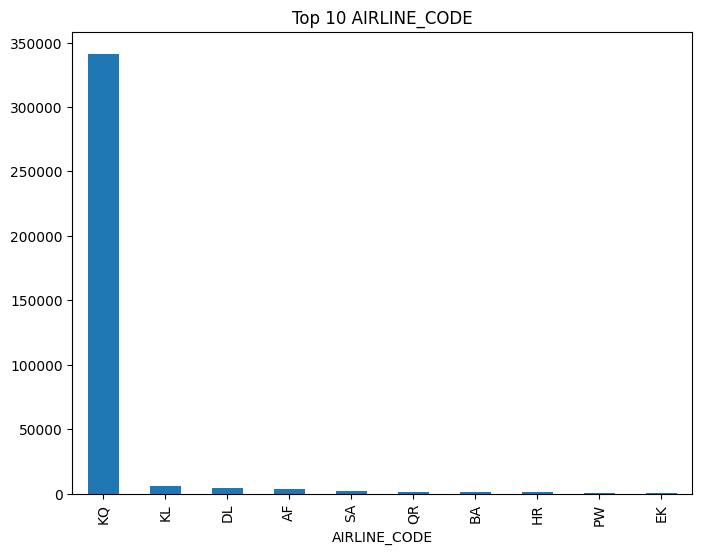

In [ ]:
#plot the histogram of the top 10 carriers(airline companies) by using the carrier column and its count
#call the function
plot_univariate('AIRLINE_CODE')

The leading carrier with over 330k tickets bought is KQ. This makes sense as it is data on sales made/ tickets bought from them or their approved agents.

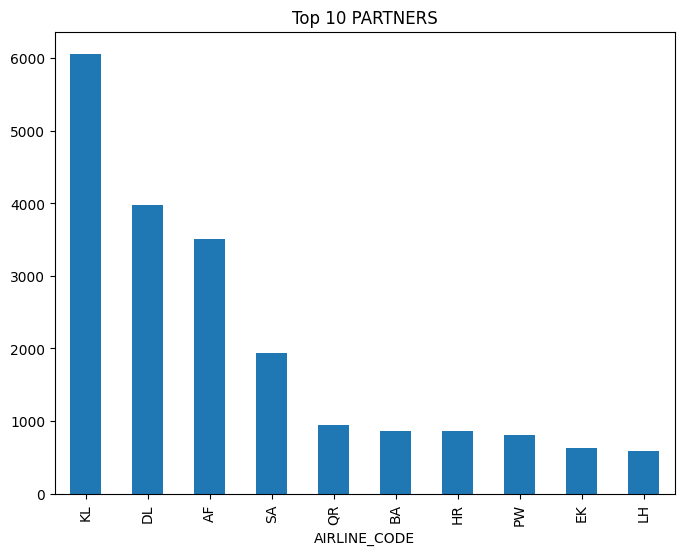

In [ ]:
#As this is the data of one specific airline sales together with the partnerships, we will mostly focus on the airline that shows up in number two downwards

plt.figure(figsize=(8, 6))
df1['AIRLINE_CODE'].value_counts().sort_values(ascending=False)[1:11].plot(kind='bar') #get the column directly
plt.title(f'Top 10 PARTNERS') #f for the string for the title
plt.show()

One of the most profitable code shares was with KLM

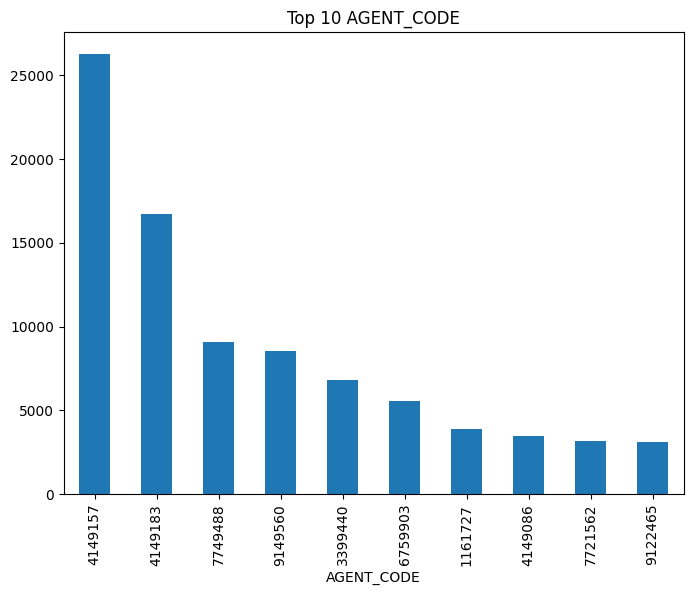

In [ ]:
#plot the histogram of the top 10 agents by using the agency codes and their count
#call the function
plot_univariate('AGENT_CODE')

The top agent per number of sales in 4149157

With using the agent-code we can eliminate dummy agents and see that web sales make the most sales.

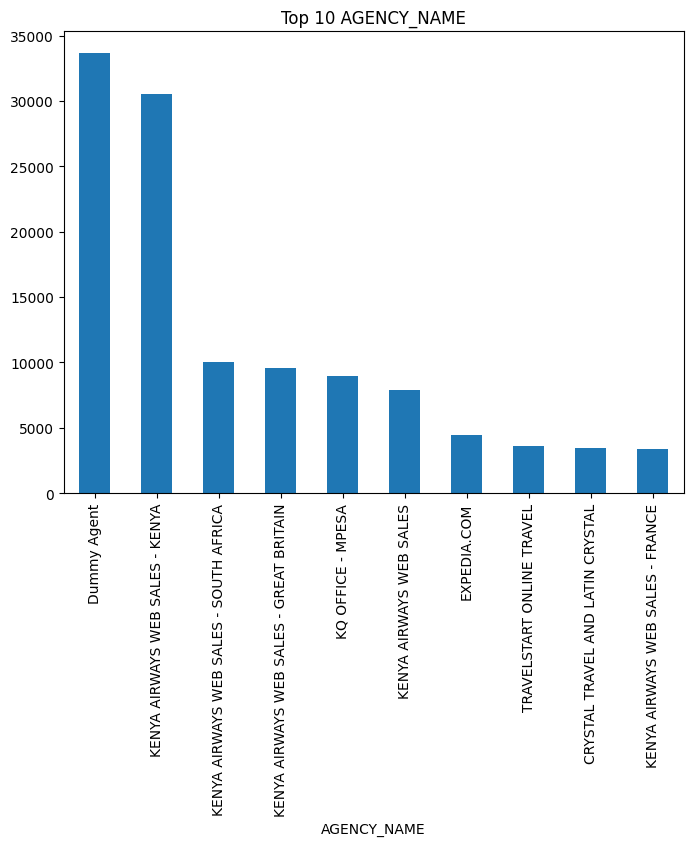

In [ ]:
plot_univariate('AGENCY_NAME')

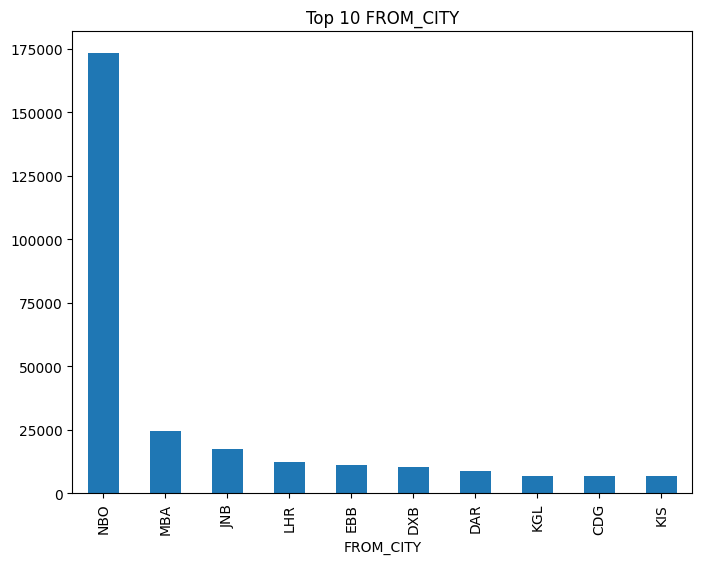

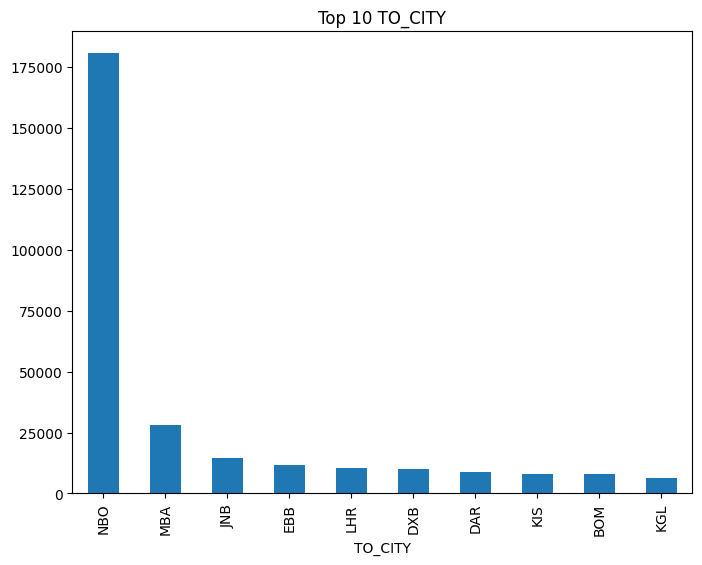

In [ ]:
#plot the histogram of the top 10 departure cities and destinations cities

plot_univariate('FROM_CITY')
plot_univariate('TO_CITY')


We can see that the most travelled to and travelled from city/airport is Nairobi. This is probably due to the most frequently used carrier being 706. With airlines, the airplanes have to return to their bases before visiting other destinations.

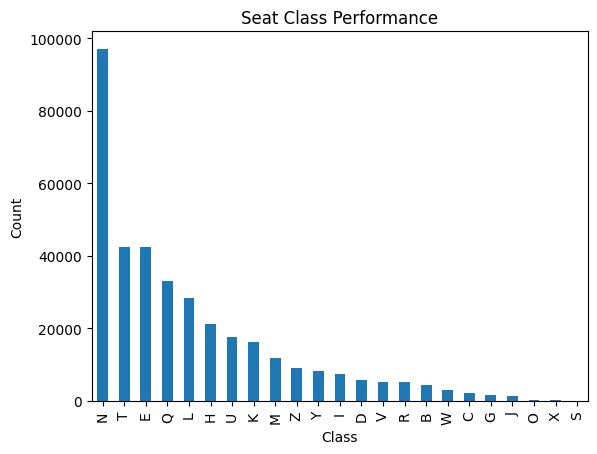

In [ ]:
#Bar graph for seat class preference
#I will not use the function as i want to see the most and least performing seat class
df1['CLASS'].value_counts().sort_values(ascending=False).plot(kind='bar')
plt.title('Seat Class Performance')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

The most frequently used class in the N (November) class. This is an economy class. The subsequent classes are also economy . The least frequent classes are business classes. The numbers generated for the N class are because this seat class is mostly a promotional seat.

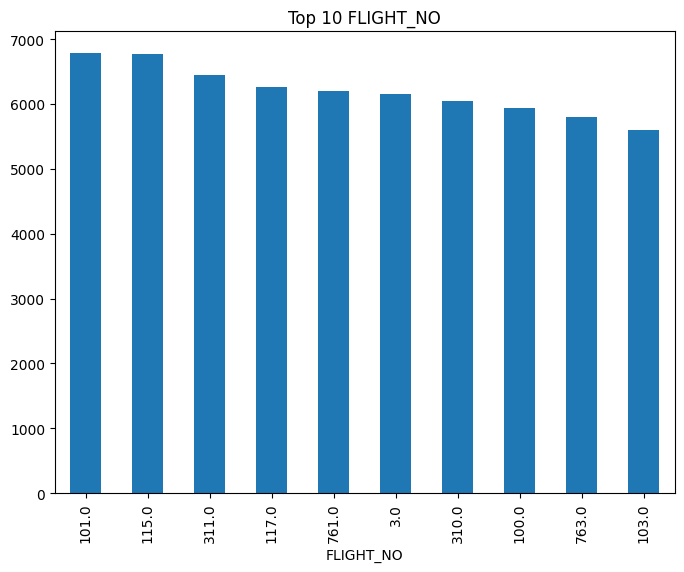

In [ ]:
plot_univariate('FLIGHT_NO')

This is the unique identifier of the planes according to the routes they fly. The most frequently used one is the 101 that flies from London to Nairobi followed by flights from both Dubai and Paris coming to Nairobi. This might be due to the Requirement of every international flight to make a stop over at its hub.

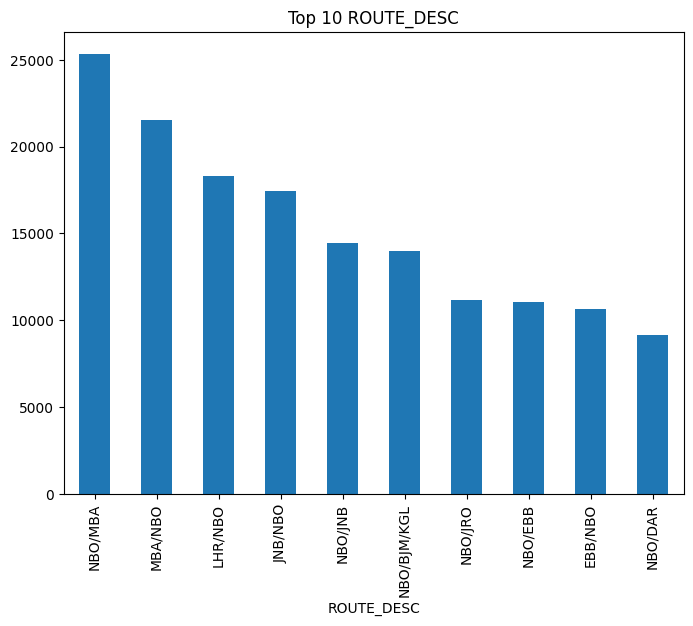

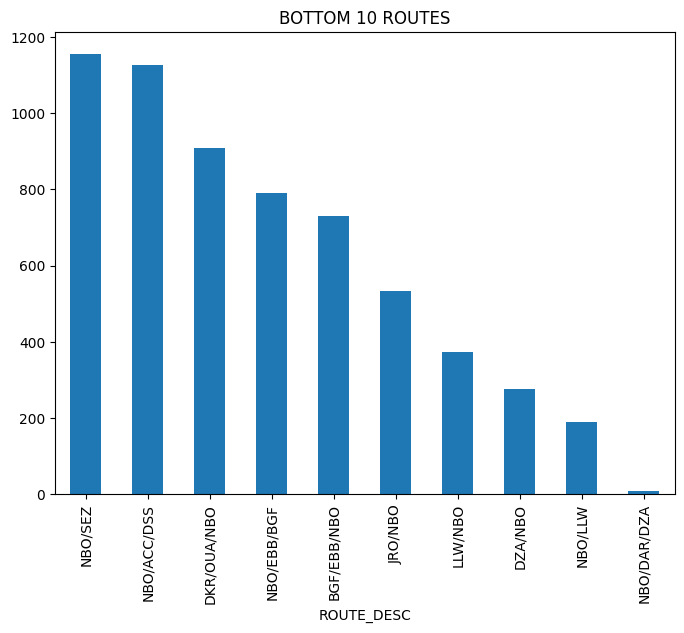

In [ ]:
#Busiest routes
plot_univariate('ROUTE_DESC')

#I would also like to identify the least performing routes
plt.figure(figsize=(8, 6))
df1['ROUTE_DESC'].value_counts().sort_values(ascending=False).tail(10).plot(kind='bar') #get the column directly
plt.title(f'BOTTOM 10 ROUTES') #f for the string for the title
plt.show()

Most frequent sales are for flights operating Kenya locally and nearby African countries. However an interesting underperforming route is Seychelles. This is surprising as it it in close proximity and also a tourist destination

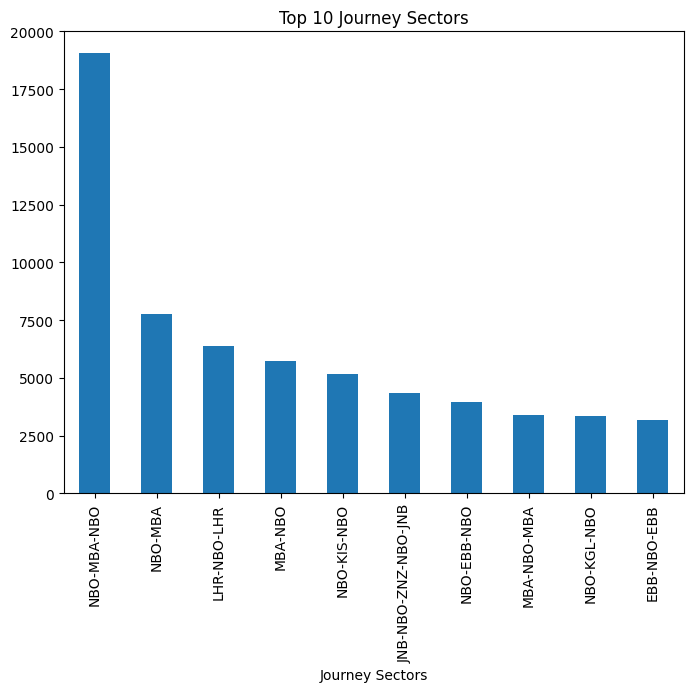

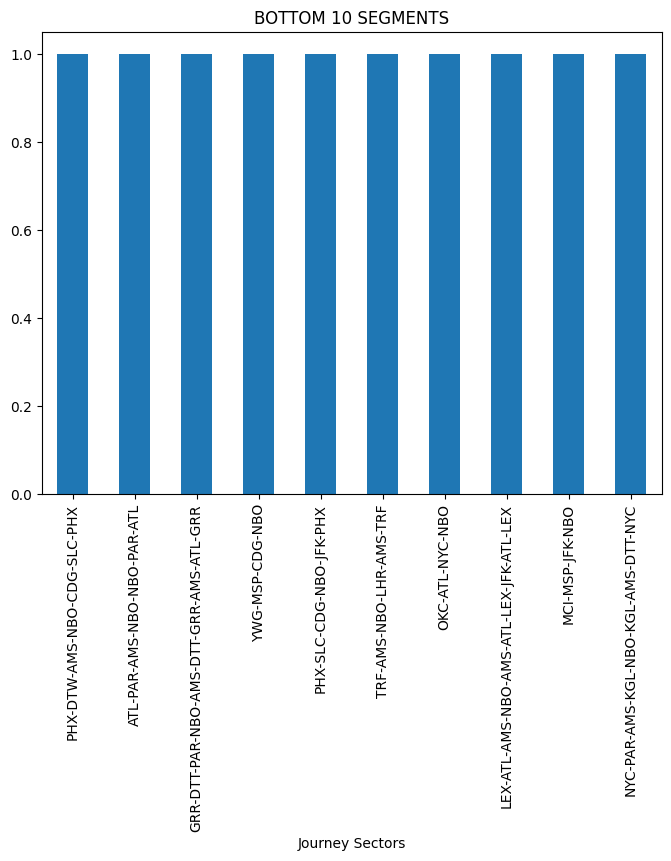

In [ ]:
#Busiest journey sectors
plot_univariate('Journey Sectors')

#I would also like to identify the least performing journey sectors
plt.figure(figsize=(8, 6))
df1['Journey Sectors'].value_counts().sort_values(ascending=False).tail(10).plot(kind='bar') #get the column directly
plt.title(f'BOTTOM 10 SEGMENTS') #f for the string for the title
plt.show()

The most performing segments are mombasa and those within Africa. The underperforming journey sectors are not the airlines direct destinations therefore this makes sense

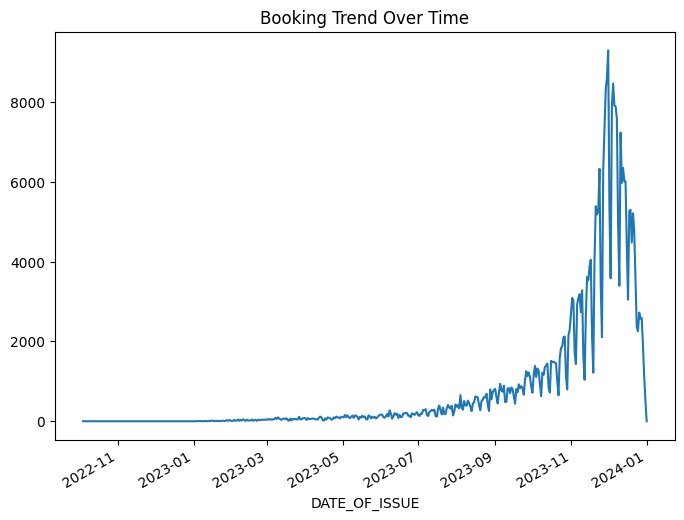

In [ ]:
plt.figure(figsize=(8, 6))
df1['DATE_OF_ISSUE'].value_counts().sort_values(ascending=False).plot(kind='line') #get the column directly
plt.title(f'Booking Trend Over Time') #f for the string for the title
plt.show()

Although some bookings were made in advance, it picked up closer to the time the flights were scheduled for (whole month of december)

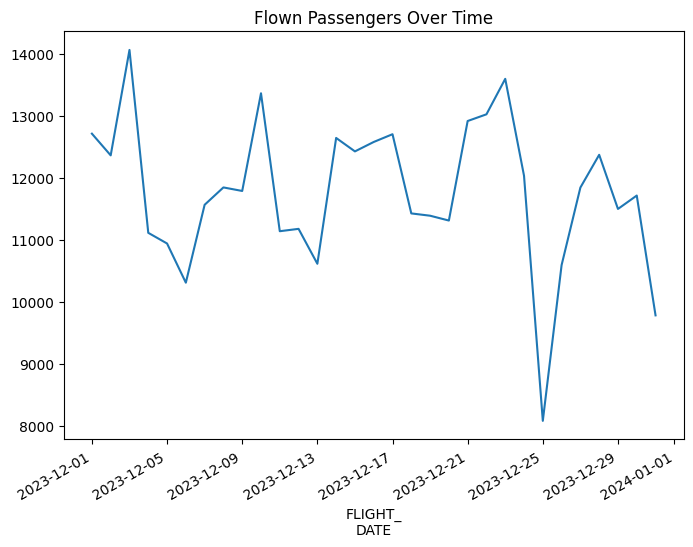

In [ ]:
plt.figure(figsize=(8, 6))
df1['FLIGHT_\nDATE'].value_counts().sort_values(ascending=False).plot(kind='line') #get the column directly
plt.title(f'Flown Passengers Over Time') #f for the string for the title
plt.show()

We can see most of the sales were for flights earlier in the month. However there is a significant dip on the 25th of Dec. Most people probably do not prefer to travel on the festive day.

###Multivariate
This is the analysis of more than one variable to show the relationship between the variables

In [ ]:
def plot_bivariate(x, y, plot_type='scatter'):
  plt.figure()
  if plot_type == 'scatter':
    plt.scatter(df1[x], df1[y])
  elif plot_type == 'line':
    plt.plot(df1[x], df1[y])
  elif plot_type == 'bar':
    df1.groupby(x)[y].sum().sort_values(ascending=False).head(10).plot(kind='bar')
  elif plot_type == 'box':
    sns.boxplot(x=df1[x], y=df1[y])
  else:
    print("Invalid plot type. Choose from 'scatter', 'line', 'bar', or 'box'.")
    return
  plt.title(f'{x} vs {y}')
  plt.xlabel(x)
  plt.ylabel(y)
  plt.show()


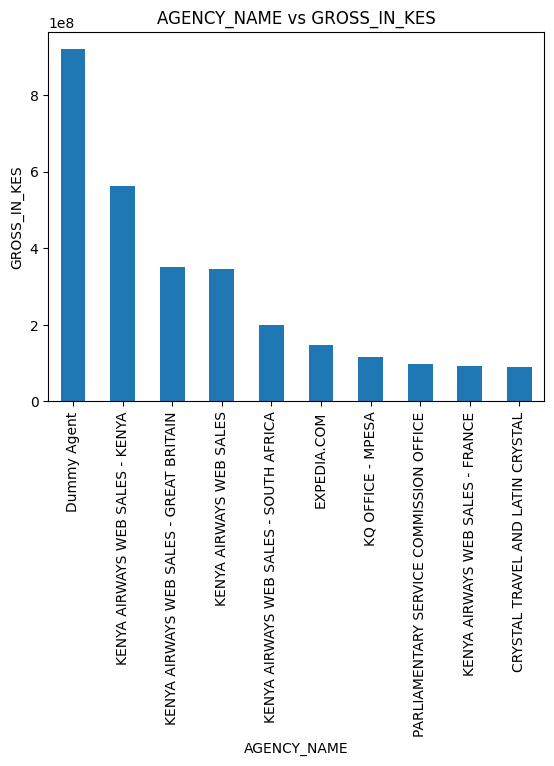

In [ ]:
plot_bivariate('AGENCY_NAME','GROSS_IN_KES','bar')


The agent bringing in the most gross are the web sales. Therefore more people prefer to book and pay for their tickets online. This is especially true for local flights. However as compared with the agents who had brought in the most ticket numbers it does not tally. Some can be explained through the fact that they mostly get last minute booking which are more expensive than advance ones.

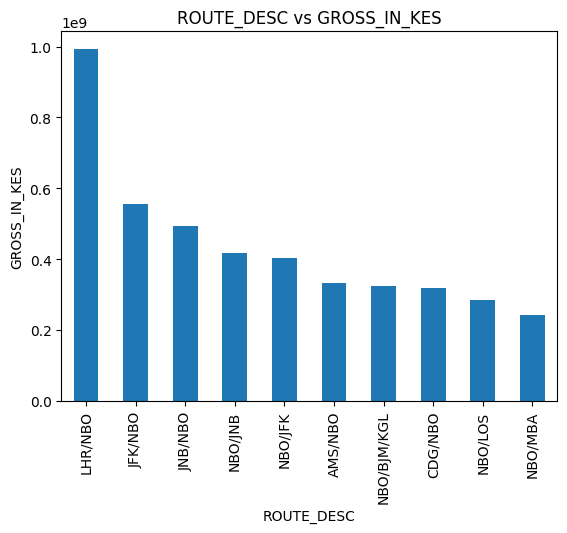

In [ ]:
#histogram of most profitable routes grouped by gross and net in KES
plot_bivariate('ROUTE_DESC','GROSS_IN_KES','bar')


The London and Johannesburg routes are bringing in the most money. This is most probably attributed to the price of the flight ticket as well as the number of passengers flying that route. The surcharge on these routes are also pretty high

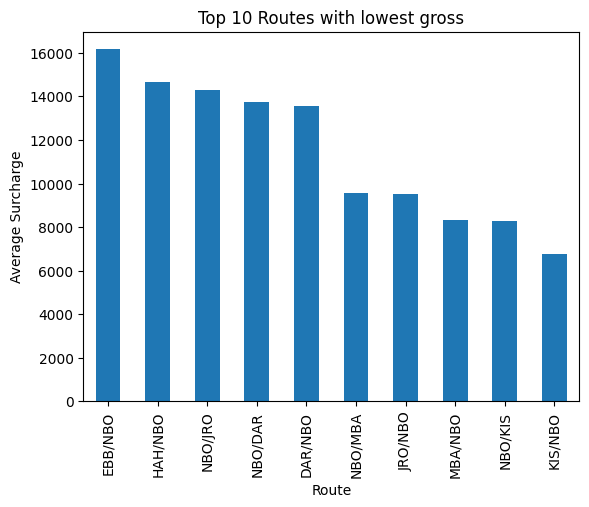

In [ ]:
#Examine the routes with the lowest gross

df1.groupby('ROUTE_DESC')['GROSS_IN_KES'].mean().sort_values(ascending=False).tail(10).plot(kind='bar')
plt.title('Top 10 Routes with lowest gross')
plt.xlabel('Route')
plt.ylabel('Average Surcharge')
plt.show()

We can also see that the lowest gross generating routes are not the underperforming ones. An interesting thing to notice is that some of the top performing routes are bringing in the lowest gross eg EE/NBO. This could mean the cpv(ticket value) is not as strong.

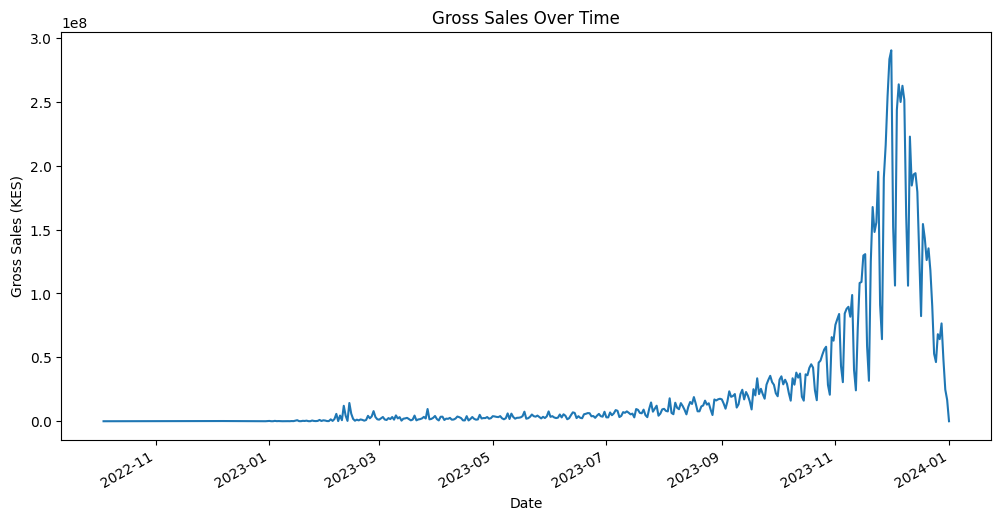

In [ ]:
#line graph of the goss sales over the days
plt.figure(figsize=(12, 6))
df1.groupby('DATE_OF_ISSUE')['GROSS_IN_KES'].sum().plot(kind='line')
plt.title('Gross Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Gross Sales (KES)')
plt.show()


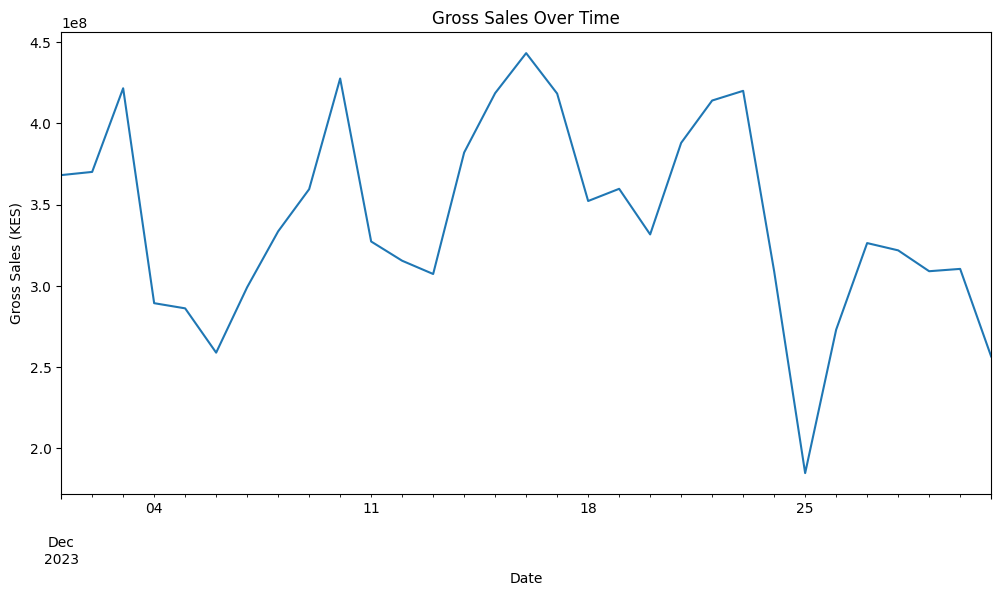

In [ ]:
#line graph of the goss sales over the days
plt.figure(figsize=(12, 6))
df1.groupby('FLIGHT_\nDATE')['GROSS_IN_KES'].sum().plot(kind='line')
plt.title('Gross Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Gross Sales (KES)')
plt.show()

The most profits were realised a week before the festive day probably due to last minute bookings

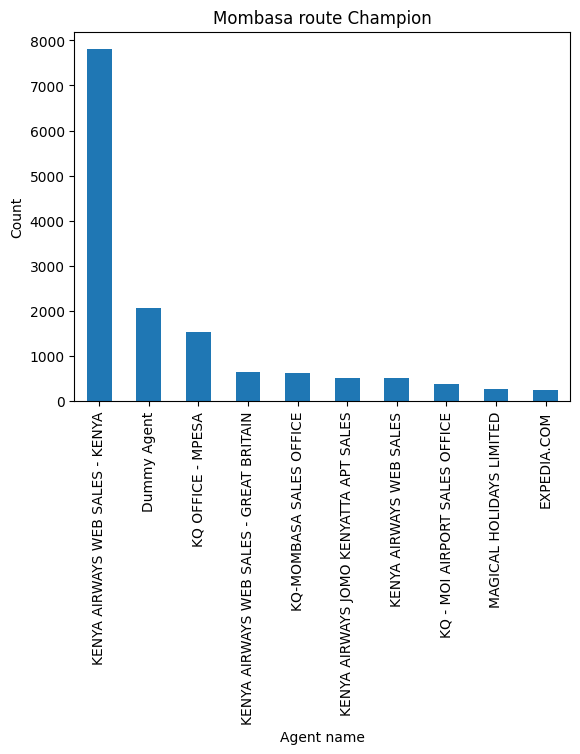

In [ ]:
df1[df1['ROUTE_DESC'] == 'NBO/MBA']['AGENCY_NAME'].value_counts().sort_values(ascending=False).head(10).plot(kind='bar')
plt.title('Mombasa route Champion')
plt.xlabel('Agent name')
plt.ylabel('Count')
plt.show()


Alot of people travelling locally prefer to book their flights online rather than through an agent. Since web sales have brought in more of the numbers for mombasa, it would beneficial to advertise promotions of the route on the website

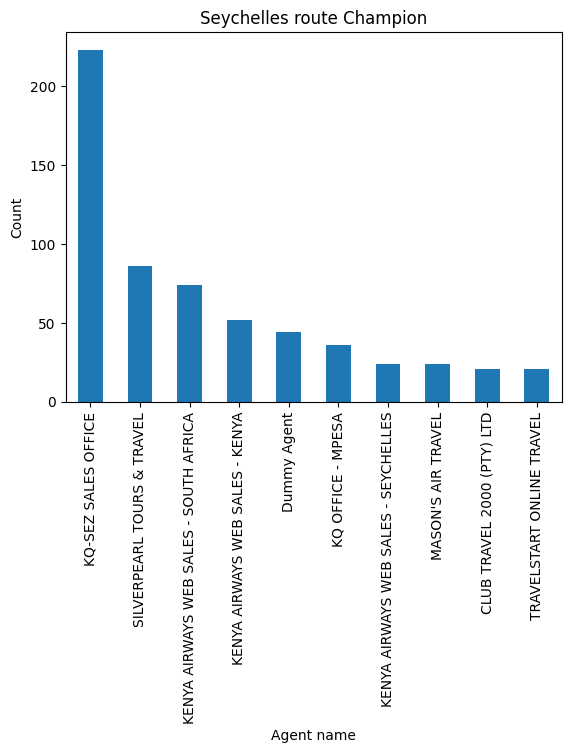

In [ ]:
df1[df1['ROUTE_DESC'] == 'NBO/SEZ']['AGENCY_NAME'].value_counts().sort_values(ascending=False).head(10).plot(kind='bar')
plt.title('Seychelles route Champion')
plt.xlabel('Agent name')
plt.ylabel('Count')
plt.show()

The most frequent route for people booking and ticketing via the online website is to and from Nairobi and Mombasa. The routes between Nairobi and Kisumu are also frequently booked.

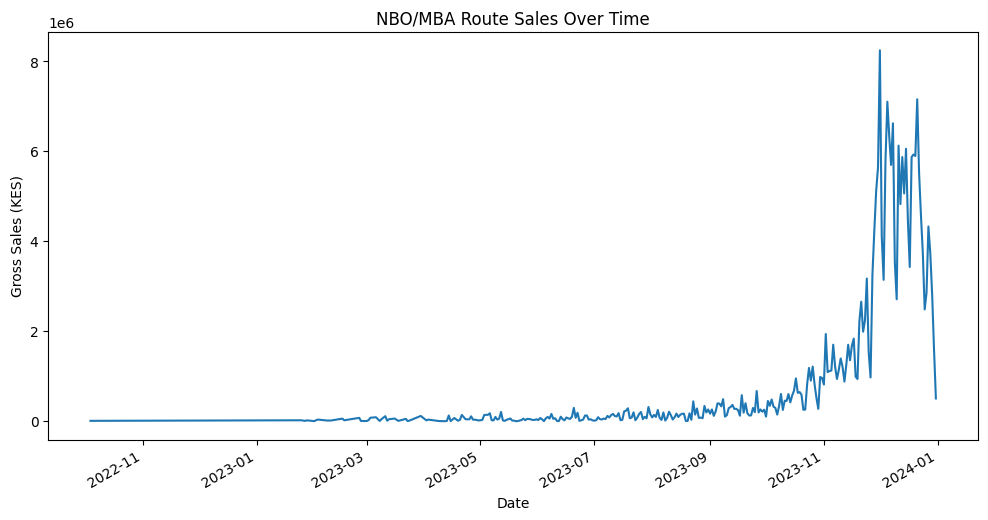

In [ ]:
# Filter data for the NBO/SEZ route
nbo_mba_df = df1[df1['ROUTE_DESC'] == 'NBO/MBA']

# Group by date and sum the gross sales
sales_over_time = nbo_mba_df.groupby('DATE_OF_ISSUE')['GROSS_IN_KES'].sum()

# Plot the line graph
plt.figure(figsize=(12, 6))
sales_over_time.plot(kind='line')
plt.title('NBO/MBA Route Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Gross Sales (KES)')
plt.show()

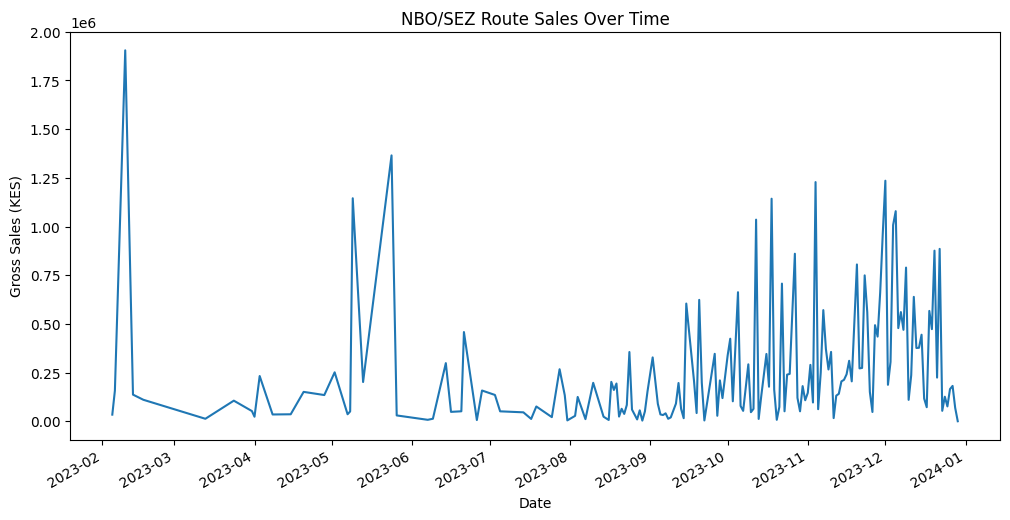

In [ ]:
# Filter data for the NBO/SEZ route
nbo_sez_df = df1[df1['ROUTE_DESC'] == 'NBO/SEZ']

# Group by date and sum the gross sales
sales_over_time = nbo_sez_df.groupby('DATE_OF_ISSUE')['GROSS_IN_KES'].sum()

# Plot the line graph
plt.figure(figsize=(12, 6))
sales_over_time.plot(kind='line')
plt.title('NBO/SEZ Route Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Gross Sales (KES)')
plt.show()


The two graphs vary. in Mombasa we can see that alot of people started to book in December or rather make last minute bookings. As for seychelles the bookings peaked in frebruary and we can dedudce that people book in advance especially if they are going on vacations

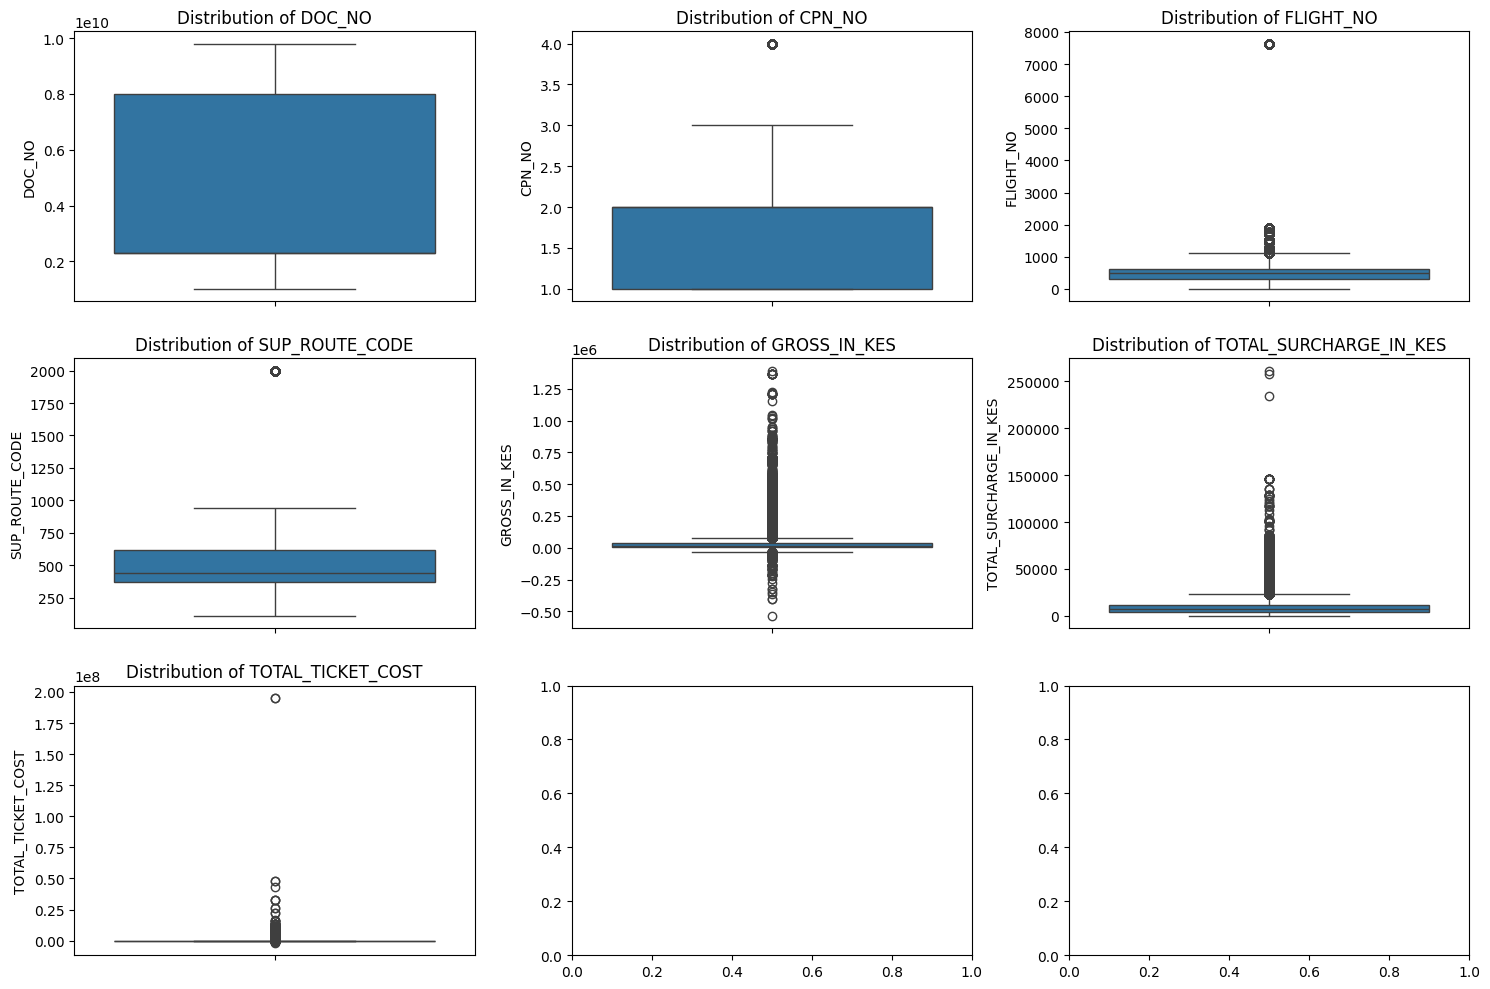

In [ ]:
import math

#get the numerical columns
numerical_cols = df1.select_dtypes(include=['float', 'int']).columns

# Calculate the number of rows and columns for the subplots
#the math.ceil is used to round up the value to the nearest possible integer
n_cols = 3
n_rows = math.ceil(len(numerical_cols) / n_cols)

# Create the subplots
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(15, 10))

# Iterate over the numerical columns and plot the boxplots
for i, col in enumerate(numerical_cols):
    row = i // n_cols
    col_num = i % n_cols
    sns.boxplot(df1[col], ax=axes[row, col_num])
    axes[row, col_num].set_title(f"Distribution of {col}")

# Adjust the layout and display the plot
plt.tight_layout()
plt.show()

There are many outliers in a lot of the numerical data. This means that the distribution varies widely. This is because alot of them are used in a categorical manner, not necessarily as values

In [ ]:
df2 = df1.copy()
# Convert string columns to numerical using LabelEncoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in df2.columns:
  if df2[col].dtype == 'object':
     df2[col] = df2[col].fillna('').astype(str)
     df2[col] = le.fit_transform(df2[col])


# Calculate correlation matrix
print(df2.corr()['GROSS_IN_KES'].sort_values(ascending=False))

GROSS_IN_KES              1.000000
TOTAL_SURCHARGE_IN_KES    0.429467
TOTAL_TICKET_COST         0.142540
DOC_NO                    0.067200
COUNTRY_NAME              0.054308
NDC INDICATOR             0.038239
COUNTRY_CODE              0.025670
AGENT_CODE                0.007560
Journey Sectors          -0.000789
DATE_OF_ISSUE            -0.008674
FLIGHT_\nDATE            -0.010658
AGENCY_NAME              -0.020483
TO_CITY                  -0.024066
AOS_NAME                 -0.026252
PLACE_OF_ISSUE           -0.027818
AIRLINE_CODE             -0.059900
CLASS                    -0.066133
FROM_CITY                -0.068743
ROUTE_DESC               -0.084343
CPN_NO                   -0.088025
FLIGHT_NO                -0.111277
SUP_ROUTE_CODE           -0.141180
Name: GROSS_IN_KES, dtype: float64


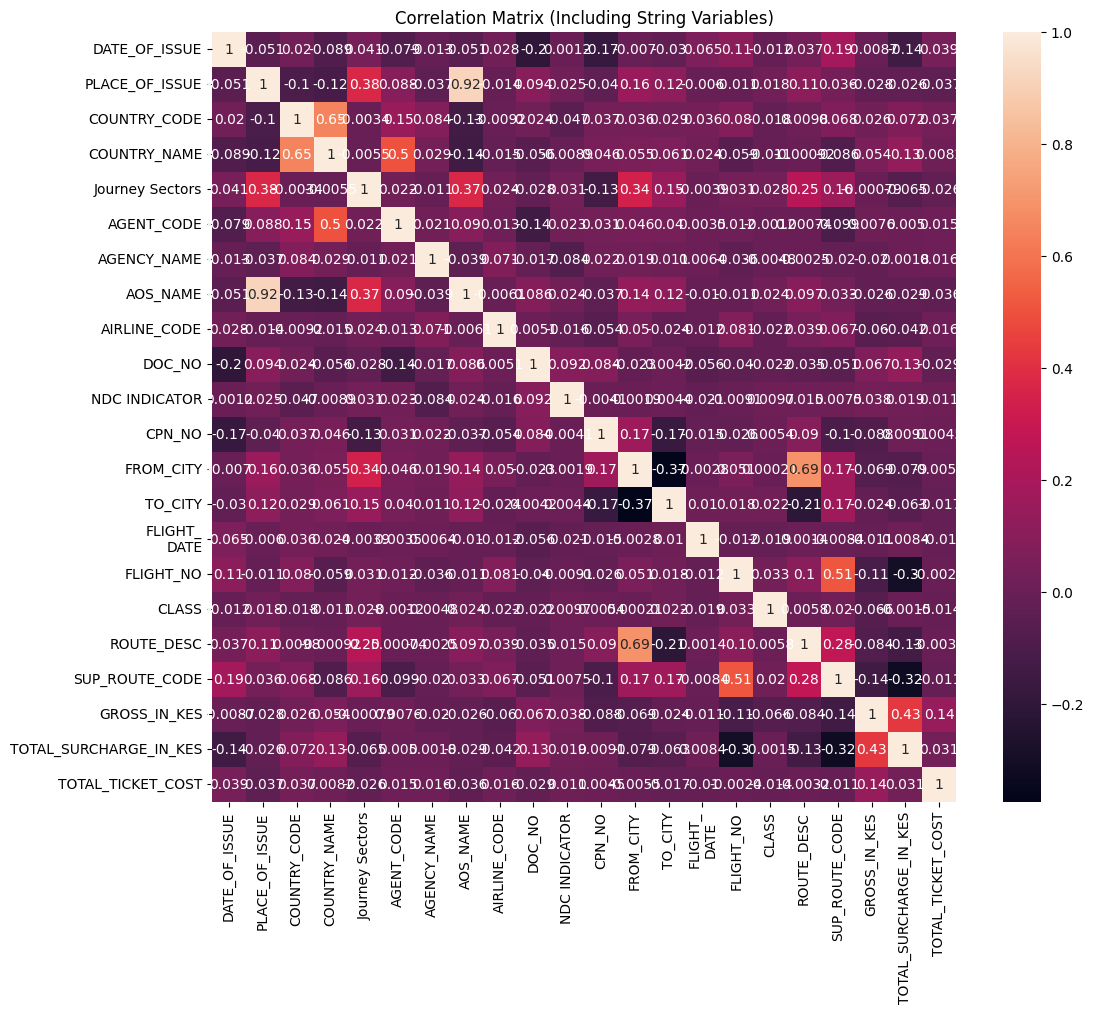

In [ ]:
# Convert string columns to numerical using LabelEncoder
for col in df2.columns:
  if df2[col].dtype == 'object':
     df2[col] = df2[col].fillna('').astype(str)
     df2[col] = le.fit_transform(df2[col])


corr_matrix = df2.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True)
plt.title("Correlation Matrix (Including String Variables)")
plt.show()

We can see the following from the correlation matrix that alot of variables have a high correlation with each other.
* The COUNTRY_CODE', 'AGENT_CODE', have a high correlation because the agents belong to a specific agency and their operations are based in a specific country.<br>
* The to and from also have high negative correlation . The planned route hardly changes and would be similar for multiple fliers. The route description is also highly influenced by the to and from as it shows the journey from start to finish.
* The type of plane and its route have a big effect in the amount of fuel the plane need thats why FLIGHT_NO and SURCHARGE_KES have a high correlation.
* The total surcharge of fuel prices and system charges are affecting the total ticket price as a direct result of the addition to gross, surchatge and commission hence the high correlation with these variables.


###Feature Engineering
Here we will manipulate, generate and delete some variables to be able to use them in the machine learning model.

In [ ]:
df3 = df1.copy()
# Calculate the difference between the flight date and the date of issue
df3['Days_Booked_Before_Flight'] = (df3['FLIGHT_\nDATE'] - df3['DATE_OF_ISSUE']).dt.days
df3.head()

,DATE_OF_ISSUE,PLACE_OF_ISSUE,COUNTRY_CODE,COUNTRY_NAME,Journey Sectors,AGENT_CODE,AGENCY_NAME,AOS_NAME,AIRLINE_CODE,DOC_NO,...,TO_CITY,FLIGHT_\nDATE,FLIGHT_NO,CLASS,ROUTE_DESC,SUP_ROUTE_CODE,GROSS_IN_KES,TOTAL_SURCHARGE_IN_KES,TOTAL_TICKET_COST,Days_Booked_Before_Flight
0,2023-10-15,NBO,KE,KENYA,NBO-NYC-PHX-JFK-NBO,4149183,KQ OFFICE - MPESA,NBO,KQ,2305045320,...,NBO,2023-12-11,3.0,E,JFK/NBO,501.0,-81881.20,0.0,-81881.20,57
1,2023-12-12,NBO,KE,KENYA,NBO-NYC-PHX-JFK-PHX-MSP-NYC-NBO,4149086,KQ - AIRWAYS TERMINAL - B/PLAZA,NBO,KQ,2305225427,...,JFK,2023-12-13,1002.0,E,NBO/JFK,501.0,-30276.33,0.0,-30276.33,1
2,2023-11-23,NBO,KE,KENYA,CMH-NYC-NBO-JFK-NBO-JFK-CMH,4149183,KENYA AIRWAYS WEB SALES - KENYA,NBO,KQ,2305178529,...,JFK,2023-12-26,2.0,E,NBO/JFK,501.0,-9414.59,0.0,-9414.59,33
3,2023-12-11,MBA,KE,KENYA,MBA-DXB-JED-DXB-MBA,4149054,KQ-MOMBASA SALES OFFICE,MBA,KQ,2305175037,...,DXB,2023-12-14,306.0,E,ROB/ACC/NBO,616.0,-3925.95,0.0,-3925.95,3
4,2023-12-08,NBO,KE,KENYA,NBO-DXB-JED-DXB-NBO,4120126,BCD TRAVEL (BR),NBO,KQ,9153923408,...,NBO,2023-12-29,311.0,D,DXB/NBO,212.0,-1227.09,0.0,-1227.09,21


In [ ]:
# Create a boolean mask for holidays
holiday_mask = df3['FLIGHT_\nDATE'].apply(lambda x: x.date() in [datetime(2023, 12, 24).date(), datetime(2023, 12, 25).date(),  datetime(2023, 12, 26).date(),  datetime(2023, 12, 31).date()])

# Create a new column 'Is_Holiday'
df3['Is_Holiday'] = holiday_mask


In [ ]:
df3.sample(10)

,DATE_OF_ISSUE,PLACE_OF_ISSUE,COUNTRY_CODE,COUNTRY_NAME,Journey Sectors,AGENT_CODE,AGENCY_NAME,AOS_NAME,AIRLINE_CODE,DOC_NO,...,FLIGHT_\nDATE,FLIGHT_NO,CLASS,ROUTE_DESC,SUP_ROUTE_CODE,GROSS_IN_KES,TOTAL_SURCHARGE_IN_KES,TOTAL_TICKET_COST,Days_Booked_Before_Flight,Is_Holiday
20729,2023-12-21,ABI,US,UNITED STATES,MBA-NBO-LHR-SEA,1161727,EXPEDIA.COM,ABI,AA,7017754144,...,2023-12-28,613.0,V,MBA/NBO,710.0,7423.83,0.00,48.46,7,False
127100,2023-12-05,NBO,KE,KENYA,NBO-MBA,4149157,KENYA AIRWAYS WEB SALES - KENYA,NBO,KQ,2305207200,...,2023-12-29,610.0,Z,NBO/MBA,710.0,13565.00,5705.00,19270.00,24,False
166345,2023-11-22,NBO,KE,KENYA,NBO-KGL-NBO,4121826,Dummy Agent,NBO,KQ,3540083550,...,2023-12-01,478.0,N,NBO/BJM/KGL,412.0,14142.31,7205.00,21347.31,9,False
256570,2023-12-23,NBO,FR,FRANCE,CDG-BGF-NBO-LHR-CDG-CDG,4149036,AIR FRANCE,PAR,KQ,2305263623,...,2023-12-23,1112.0,B,NBO/CDG,113.0,51054.86,10933.96,11237.33,0,False
284884,2023-09-01,NBO,KE,KENYA,NBO-BOM-NBO,4121810,Dummy Agent,NBO,KQ,1617335619,...,2023-12-05,202.0,N,NBO/BOM,210.0,23487.86,12561.99,36049.85,95,False
322698,2023-07-17,MBA,KE,KENYA,MBA-NBO-LHR-NBO-MBA,4149054,KQ-MOMBASA SALES OFFICE,MBA,KQ,2304731305,...,2023-12-16,101.0,T,LHR/NBO,110.0,24636.82,17312.57,41949.39,152,False
265002,2023-05-10,JNB,ZA,SOUTH AFRICA,JNB-NBO-ZNZ-NBO-JNB,7721697,THE HOLIDAY FACTORY PTY LTD,JNB,KQ,9696357454,...,2023-12-16,761.0,H,JNB/NBO,514.0,15922.07,11288.39,13209.65,220,False
218795,2023-09-07,SEZ,SC,SEYCHELLES,SEZ-NBO-TNR-NBO-SEZ,7320993,OCEAN AIR TRAVEL,SEZ,KQ,2304699161,...,2023-12-06,257.0,N,TNR/NBO,419.0,6972.61,9064.70,9681.31,90,False
287558,2023-11-18,YOW,CA,CANADA,LHR-NBO-MBA-NBO-KIS-NBO-AMS-BHX,6759903,Dummy Agent,YOW,KQ,9190697496,...,2023-12-12,116.0,N,NBO/AMS,111.0,10790.46,12728.84,12824.47,24,False
183518,2023-10-11,LOS,NG,NIGERIA,LOS-NBO-JNB-NBO-LOS,5922210,TRAVELSTART,LOS,KQ,9171546578,...,2023-12-05,760.0,E,NBO/JNB,514.0,9499.46,7835.99,53657.94,55,False


In [ ]:
#for predicting on a specific route
df4 = df3.copy()

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in df3.columns:
  if df3[col].dtype == 'object':
     df3[col] = df3[col].fillna('').astype(str)
     df3[col] = le.fit_transform(df3[col])

In [ ]:
df3.head()


,DATE_OF_ISSUE,PLACE_OF_ISSUE,COUNTRY_CODE,COUNTRY_NAME,Journey Sectors,AGENT_CODE,AGENCY_NAME,AOS_NAME,AIRLINE_CODE,DOC_NO,...,FLIGHT_\nDATE,FLIGHT_NO,CLASS,ROUTE_DESC,SUP_ROUTE_CODE,GROSS_IN_KES,TOTAL_SURCHARGE_IN_KES,TOTAL_TICKET_COST,Days_Booked_Before_Flight,Is_Holiday
0,2023-10-15,345,69,70,14120,2684,2012,311,29,2305045320,...,2023-12-11,3.0,3,17,501.0,-81881.20,0.0,-81881.20,57,False
1,2023-12-12,345,69,70,14121,2667,1973,311,29,2305225427,...,2023-12-13,1002.0,3,51,501.0,-30276.33,0.0,-30276.33,1,False
2,2023-11-23,345,69,70,3366,2684,1879,311,29,2305178529,...,2023-12-26,2.0,3,51,501.0,-9414.59,0.0,-9414.59,33,True
3,2023-12-11,304,69,70,11636,2655,2020,275,29,2305175037,...,2023-12-14,306.0,3,67,616.0,-3925.95,0.0,-3925.95,3,False
4,2023-12-08,345,69,70,13470,2373,530,311,29,9153923408,...,2023-12-29,311.0,2,11,212.0,-1227.09,0.0,-1227.09,21,False


Machine Learning

We use the feature importance to evaluate the most important variable that influences the gross of the ticket.

In [ ]:

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score


# Select features and target variable
X = df3.drop('GROSS_IN_KES', axis=1)  # Features
for col in X.select_dtypes(include=['datetime64']).columns:
    X[col] = X[col].view('int64')
y = df3['GROSS_IN_KES']  # Target variable

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model
#mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


print(f"R-squared: {r2}")


R-squared: 0.8999592966959351


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# Assuming 'GROSS_IN_KES' is your target variable
X = df3.drop('GROSS_IN_KES', axis=1)
for col in X.select_dtypes(include=['datetime64']).columns:
    X[col] = X[col].view('int64')
y = df3['GROSS_IN_KES']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Random Forest Regressor model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Get feature importances
feature_importances = rf_model.feature_importances_

# Create a DataFrame to display feature importances
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values('Importance', ascending=False)

# Print or display the feature importances
print(feature_importance_df)

                      Feature  Importance
16                      CLASS    0.294749
19     TOTAL_SURCHARGE_IN_KES    0.250465
20          TOTAL_TICKET_COST    0.129849
4             Journey Sectors    0.071734
15                  FLIGHT_NO    0.037061
5                  AGENT_CODE    0.021422
7                    AOS_NAME    0.020709
9                      DOC_NO    0.018784
18             SUP_ROUTE_CODE    0.018130
21  Days_Booked_Before_Flight    0.017415
2                COUNTRY_CODE    0.016546
3                COUNTRY_NAME    0.015417
0               DATE_OF_ISSUE    0.012832
14              FLIGHT_\nDATE    0.012405
6                 AGENCY_NAME    0.012380
8                AIRLINE_CODE    0.012060
1              PLACE_OF_ISSUE    0.011688
11                     CPN_NO    0.008922
17                 ROUTE_DESC    0.007628
13                    TO_CITY    0.005177
12                  FROM_CITY    0.003891
22                 Is_Holiday    0.000629
10              NDC INDICATOR    0

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score


# Select features and target variable
X = df3[['CLASS', 'TOTAL_SURCHARGE_IN_KES', 'TOTAL_TICKET_COST' ,'Journey Sectors','FLIGHT_NO' ,'AGENT_CODE', 'AOS_NAME',
'DOC_NO' ,'SUP_ROUTE_CODE' ,'Days_Booked_Before_Flight' , 'COUNTRY_CODE'   , 'COUNTRY_NAME'   ,'DATE_OF_ISSUE' , 'FLIGHT_\nDATE',
 'AGENCY_NAME'   , 'AIRLINE_CODE' ,'PLACE_OF_ISSUE']]
for col in X.select_dtypes(include=['datetime64']).columns:
    X[col] = X[col].view('int64')
y = df3['GROSS_IN_KES']  # Target variable

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model
#mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


print(f"R-squared: {r2}")

Mean Squared Error: 165430488.41010958
R-squared: 0.9021302204321937


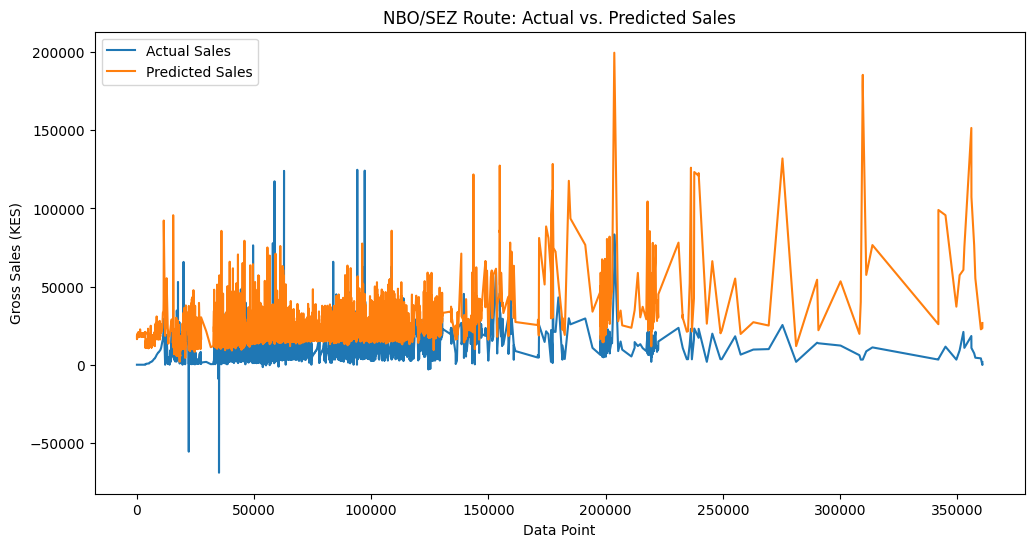

In [ ]:
# Filter data for the NBO/SEZ route
nbo_mba_df = df4[df4['ROUTE_DESC'] == 'NBO/MBA'].copy()

# Convert string columns to numerical using LabelEncoder
le = LabelEncoder()
for col in nbo_sez_df.columns:
  if nbo_mba_df[col].dtype == 'object':
     nbo_mba_df[col] = nbo_mba_df[col].fillna('').astype(str)
     nbo_mba_df[col] = le.fit_transform(nbo_mba_df[col])

# Select features and target variable for NBO/SEZ route
X_nbo_mba = nbo_mba_df[['CLASS', 'TOTAL_SURCHARGE_IN_KES', 'TOTAL_TICKET_COST' ,'Journey Sectors','FLIGHT_NO' ,'AGENT_CODE', 'AOS_NAME',
'DOC_NO' ,'SUP_ROUTE_CODE' ,'Days_Booked_Before_Flight' , 'COUNTRY_CODE'   , 'COUNTRY_NAME'   ,'DATE_OF_ISSUE' , 'FLIGHT_\nDATE',
 'AGENCY_NAME'   , 'AIRLINE_CODE' ,'PLACE_OF_ISSUE']]
for col in X_nbo_mba.select_dtypes(include=['datetime64']).columns:
    X_nbo_mba[col] = X_nbo_mba[col].view('int64')
y_nbo_mba = nbo_mba_df['GROSS_IN_KES']

# Make predictions using the trained model
y_pred_nbo_mba = rf_model.predict(X_nbo_mba)

# Create a DataFrame to hold actual and predicted sales
sales_df = pd.DataFrame({'Actual Sales': y_nbo_mba, 'Predicted Sales': y_pred_nbo_mba})

# Plot the line graph
plt.figure(figsize=(12, 6))
plt.plot(sales_df['Actual Sales'], label='Actual Sales')
plt.plot(sales_df['Predicted Sales'], label='Predicted Sales')
plt.title('NBO/SEZ Route: Actual vs. Predicted Sales')
plt.xlabel('Data Point')
plt.ylabel('Gross Sales (KES)')
plt.legend()
plt.show()


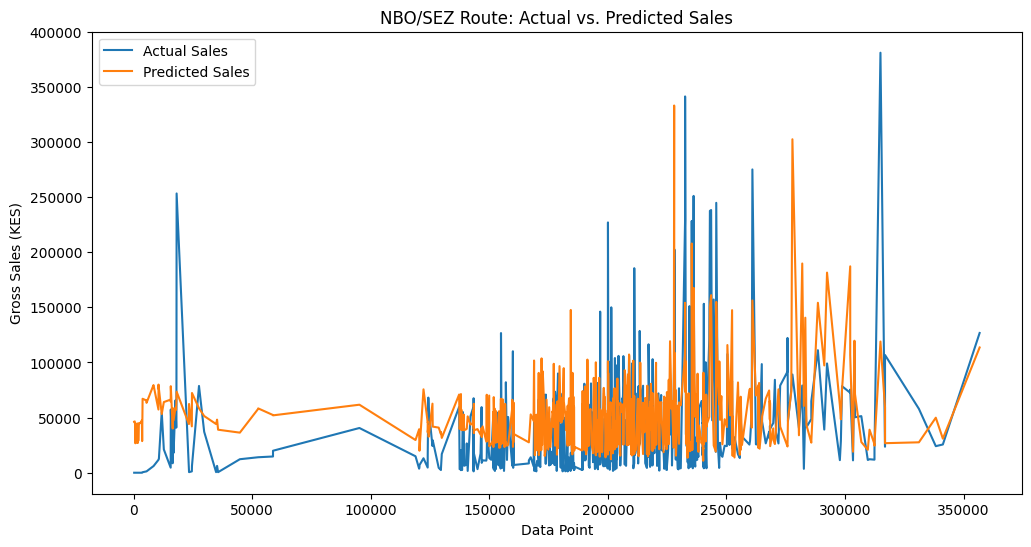

In [ ]:
# Filter data for the NBO/SEZ route
nbo_sez_df = df4[df4['ROUTE_DESC'] == 'NBO/SEZ'].copy()

# Convert string columns to numerical using LabelEncoder
le = LabelEncoder()
for col in nbo_sez_df.columns:
  if nbo_sez_df[col].dtype == 'object':
     nbo_sez_df[col] = nbo_sez_df[col].fillna('').astype(str)
     nbo_sez_df[col] = le.fit_transform(nbo_sez_df[col])

# Select features and target variable for NBO/SEZ route
X_nbo_sez = nbo_sez_df[['CLASS', 'TOTAL_SURCHARGE_IN_KES', 'TOTAL_TICKET_COST' ,'Journey Sectors','FLIGHT_NO' ,'AGENT_CODE', 'AOS_NAME',
'DOC_NO' ,'SUP_ROUTE_CODE' ,'Days_Booked_Before_Flight' , 'COUNTRY_CODE'   , 'COUNTRY_NAME'   ,'DATE_OF_ISSUE' , 'FLIGHT_\nDATE',
 'AGENCY_NAME'   , 'AIRLINE_CODE' ,'PLACE_OF_ISSUE']]
for col in X_nbo_sez.select_dtypes(include=['datetime64']).columns:
    X_nbo_sez[col] = X_nbo_sez[col].view('int64')
y_nbo_sez = nbo_sez_df['GROSS_IN_KES']

# Make predictions using the trained model
y_pred_nbo_sez = rf_model.predict(X_nbo_sez)

# Create a DataFrame to hold actual and predicted sales
sales_df = pd.DataFrame({'Actual Sales': y_nbo_sez, 'Predicted Sales': y_pred_nbo_sez})

# Plot the line graph
plt.figure(figsize=(12, 6))
plt.plot(sales_df['Actual Sales'], label='Actual Sales')
plt.plot(sales_df['Predicted Sales'], label='Predicted Sales')
plt.title('NBO/SEZ Route: Actual vs. Predicted Sales')
plt.xlabel('Data Point')
plt.ylabel('Gross Sales (KES)')
plt.legend()
plt.show()


In [ ]:
pip install prophet

Prophet is a forecating procedure that makes prediction of future trends easier. It works best with time series that have strong seasonal effects and several seasons of historical data. Prophet is robust to missing data and shifts in the trend, and typically handles outliers well.<br>

Prophet is open source software released by Facebook’s Core Data Science team.

In [ ]:
from prophet import Prophet


In [ ]:
# Group the data by date and sum the gross sales
daily_sales = df4.groupby('FLIGHT_\nDATE')['GROSS_IN_KES'].sum().reset_index()

# Rename the columns to fit Prophet's requirements
daily_sales.columns = ['ds', 'y']

# Initialize Prophet model
model = Prophet()

# Fit the model
model.fit(daily_sales)

# Make a future dataframe for the next 7 days
future = model.make_future_dataframe(periods=7)

# Forecast
forecast = model.predict(future)

# Display the forecasted values
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']])

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 23.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpynze0_f8/8tglkzw5.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpynze0_f8/ox1x4glc.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=94082', 'data', 'file=/tmp/tmpynze0_f8/8tglkzw5.json', 'init=/tmp/tmpynze0_f8/ox1x4glc.json', 'output', 'file=/tmp/tmpynze0_f8/prophet_modelw604cqyz/prophet_model-20240913083936.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
08:39:36 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:39:36 - cmdstanpy - INFO - Chain [1] done processing
INFO:

           ds          yhat    yhat_lower    yhat_upper
0  2023-12-01  3.901513e+08  3.337258e+08  4.489246e+08
1  2023-12-02  4.021509e+08  3.376900e+08  4.609090e+08
2  2023-12-03  3.881069e+08  3.258883e+08  4.504693e+08
3  2023-12-04  3.044732e+08  2.443658e+08  3.630437e+08
4  2023-12-05  3.246748e+08  2.632267e+08  3.843782e+08
5  2023-12-06  3.221297e+08  2.575649e+08  3.817670e+08
6  2023-12-07  3.638707e+08  3.001950e+08  4.231620e+08
7  2023-12-08  3.794426e+08  3.215095e+08  4.382510e+08
8  2023-12-09  3.914421e+08  3.293685e+08  4.476039e+08
9  2023-12-10  3.773981e+08  3.195458e+08  4.384248e+08
10 2023-12-11  2.937645e+08  2.330606e+08  3.569096e+08
11 2023-12-12  3.139637e+08  2.549412e+08  3.736358e+08
12 2023-12-13  3.114163e+08  2.518529e+08  3.703755e+08
13 2023-12-14  3.531538e+08  2.929939e+08  4.150964e+08
14 2023-12-15  3.687215e+08  3.078601e+08  4.303882e+08
15 2023-12-16  3.807113e+08  3.185631e+08  4.422627e+08
16 2023-12-17  3.666547e+08  3.076226e+08  4.262

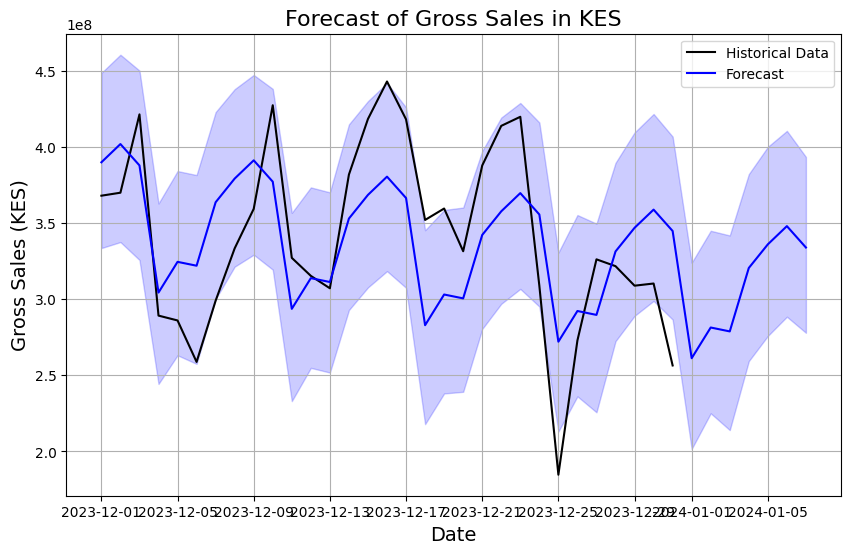

In [ ]:

# Plotting the forecast with custom colors
fig, ax = plt.subplots(figsize=(10, 6))

# Plot historical data
ax.plot(daily_sales['ds'], daily_sales['y'], label='Historical Data', color='black')

# Plot forecasted data
ax.plot(forecast['ds'], forecast['yhat'], label='Forecast', color='blue', linestyle='-')
ax.fill_between(forecast['ds'], forecast['yhat_lower'], forecast['yhat_upper'], color='blue', alpha=0.2)

# Customize plot
ax.set_title('Forecast of Gross Sales in KES', fontsize=16)
ax.set_xlabel('Date', fontsize=14)
ax.set_ylabel('Gross Sales (KES)', fontsize=14)
ax.legend()
plt.grid(True)
plt.show()

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error


# Calculate error metrics
y_true = daily_sales['y']
y_pred = forecast['yhat'][:len(daily_sales)]

mae = mean_absolute_error(y_true, y_pred)
mse = mean_squared_error(y_true, y_pred)
rmse = np.sqrt(mse)

print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')

Mean Absolute Error (MAE): 42373010.50484339
Mean Squared Error (MSE): 2234521057940262.2
Root Mean Squared Error (RMSE): 47270720.937386416


Since Prophet uses the seasonality of historical data to predict trends, it generates a big mse due to the innacuracy of some values.


## Conclusion

There are many determinants that determine whether an airline should continue operating in a certain route, even when the route is performing poorly. Short term goals such as immediate profits should not be the key as they could become losses once operational costs are factored in. However this analysis gives us the opprtunity to monitor and predict future performance of these route and make informed decisions on whether to: increase promotions, change the aircraft type, or even change the schedule of flights operating this route. Firther information spanning over months would be beneficial.